Вариант 30. 

In [4]:
%matplotlib inline
import numpy as np
from time import clock
from skimage import io as skio
from skimage import color
from matplotlib import pyplot as plt


def calculate_grad_2d(image):
    grad = np.gradient(image)
    grad = (grad[0] ** 2 + grad[1] ** 2) ** 0.5
    return grad


def calculate_watershed_2d(grad, points, q):
    counter = 0
    flag = np.zeros(grad.shape).astype(np.bool)
    mask = np.zeros(grad.shape).astype(np.int)    
    steps = [(1, 0), (0, 1), (-1, 0), (0, -1)]
    
    for i, j in enumerate(points):
        flag[j] = True
        mask[j] = i + 1
        q.insert((grad[j], counter), j)
        counter += 1

    while len(q) != 0:
        x, y = q.extract_minimum()[1]
        for st in steps:
            cx = x + st[0]
            cy = y + st[1]
            if 0 <= cx < grad.shape[0] and 0 <= cy < grad.shape[1]:
                if not flag[cx, cy]:
                    mask[cx, cy] = mask[x, y]  
                    flag[cx, cy] = True
                    q.insert((grad[cx, cy], counter), (cx, cy))
                    counter += 1
    return mask


def show_image(image):
    plt.figure(figsize=(10, 8))
    plt.axis('off')
    skio.imshow(image)
    plt.plot()
    skio.show()
    

def calculate_grad_3d(image):
    grad = np.gradient(image)
    grad = (grad[0] ** 2 + grad[1] ** 2 + grad[2] ** 2) ** 0.5
    return grad


def calculate_watershed_3d(grad, points, q):
    counter = 0
    mask = np.zeros(grad.shape).astype(np.int)
    flag = np.zeros(grad.shape).astype(np.bool)    
    steps = [(1, 0, 0), (0, 1, 0), (0, 0, 1), (-1, 0, 0), (0, -1, 0), (0, 0, -1)]
  
    for i, j in enumerate(points):     
        flag[j] = True
        mask[j] = i + 1
        q.insert((grad[j], counter), j)
        counter += 1

    while len(q) != 0:
        x, y, z = q.extract_minimum()[1]
        for st in steps:
            cx = x + st[0]
            cy = y + st[1]
            cz = z + st[2]
            if 0 <= cx < grad.shape[0] and 0 <= cy < grad.shape[1] and 0 <= cz < grad.shape[2]:
                if not flag[cx, cy, cz]:
                    mask[cx, cy, cz] = mask[x, y, z]  
                    flag[cx, cy, cz] = True
                    q.insert((grad[cx, cy, cz], counter), (cx, cy, cz))
                    counter += 1
    return mask

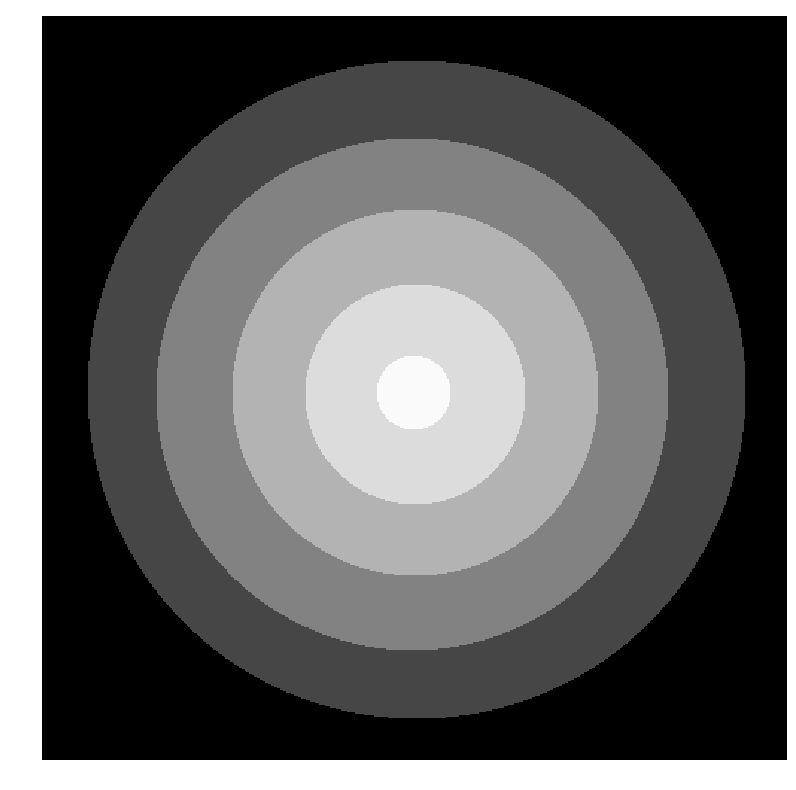

In [2]:
image = color.rgb2gray(skio.imread('data/circles.png'))
show_image(image)

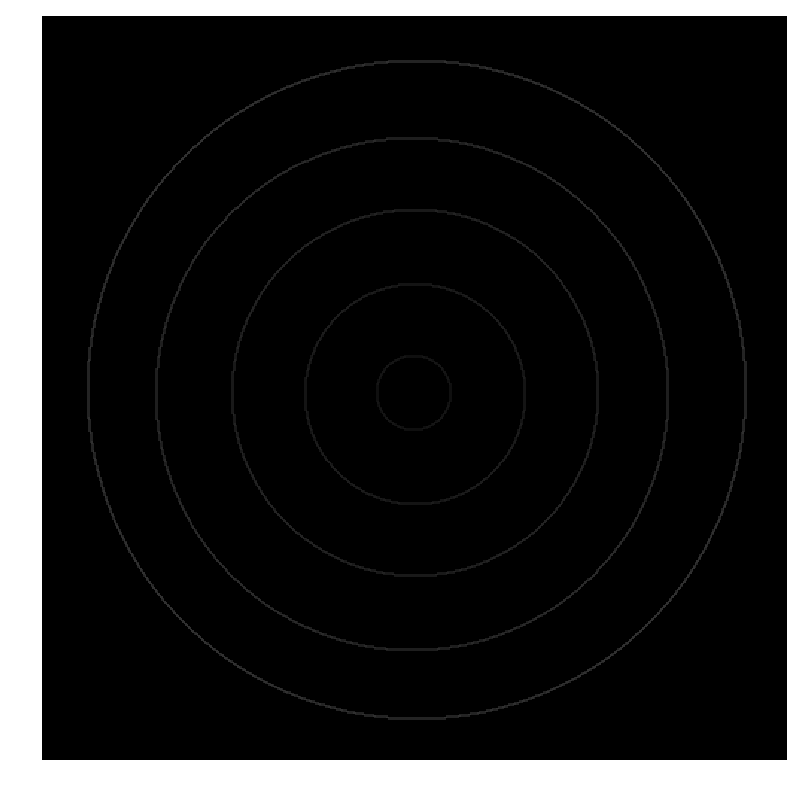

In [3]:
grad = calculate_grad_2d(image)
show_image(grad)

1.7431859999999997


/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


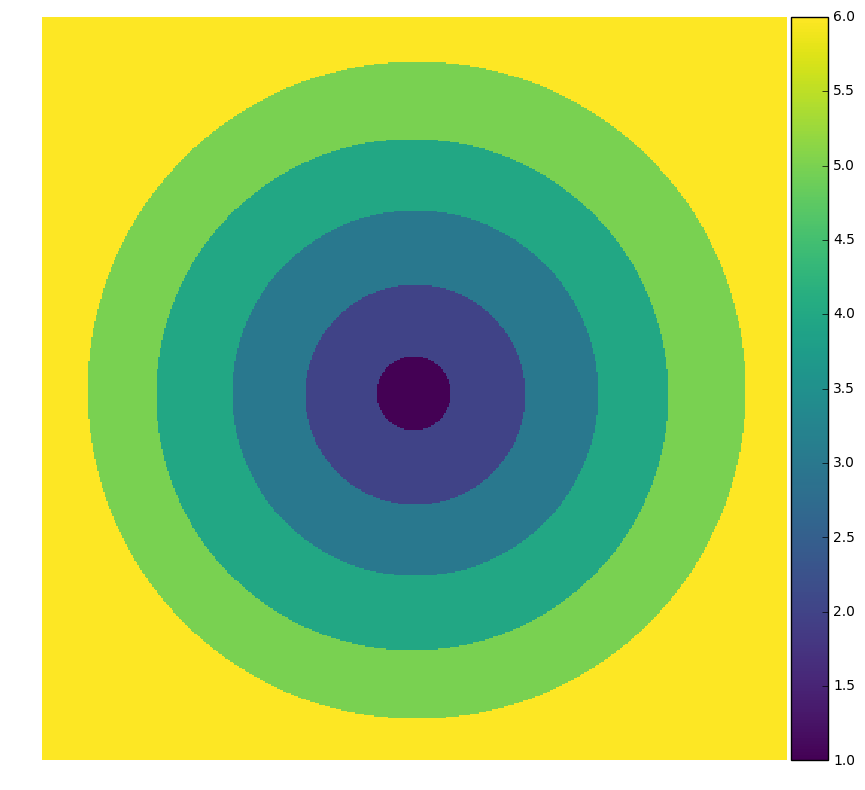

In [6]:
from queues import HierarchicalQueue, PriorityQueue
points = [(250, 250), (200, 250), (150, 250), 
          (100, 250), (50, 250), (0, 250)]
begin_time = clock()
image = calculate_watershed_2d(grad, points, PriorityQueue())
end_time = clock()
print(end_time - begin_time)
show_image(image)

1.9920390000000001


/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


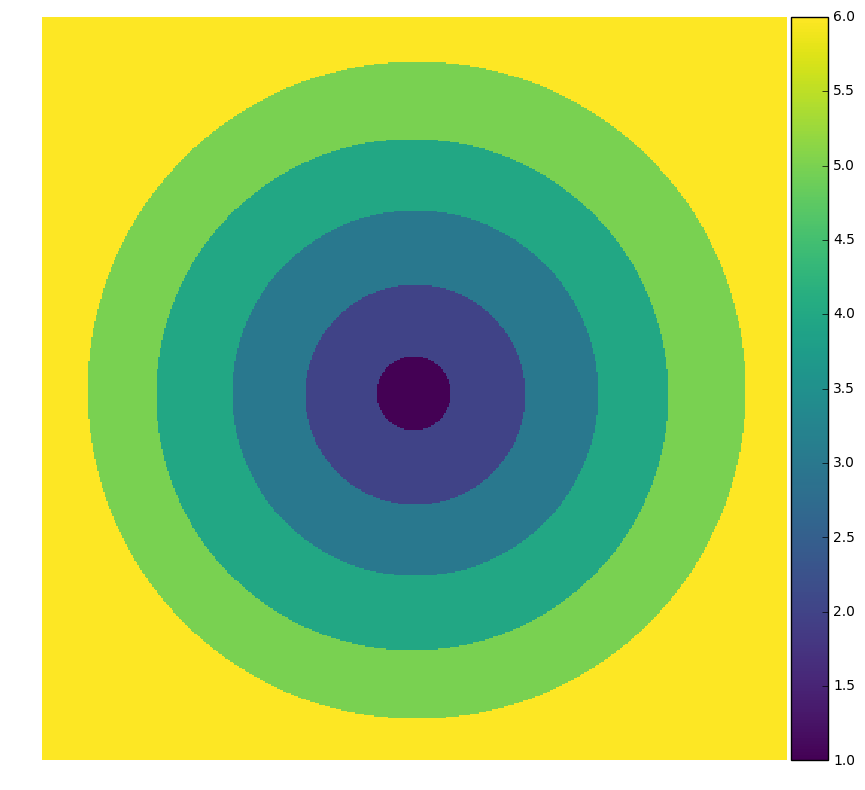

In [7]:
points = [(250, 250), (200, 250), (150, 250), 
          (100, 250), (50, 250), (0, 250)]
begin_time = clock()
image = calculate_watershed_2d(grad, points, HierarchicalQueue())
end_time = clock()
print(end_time - begin_time)
show_image(image)

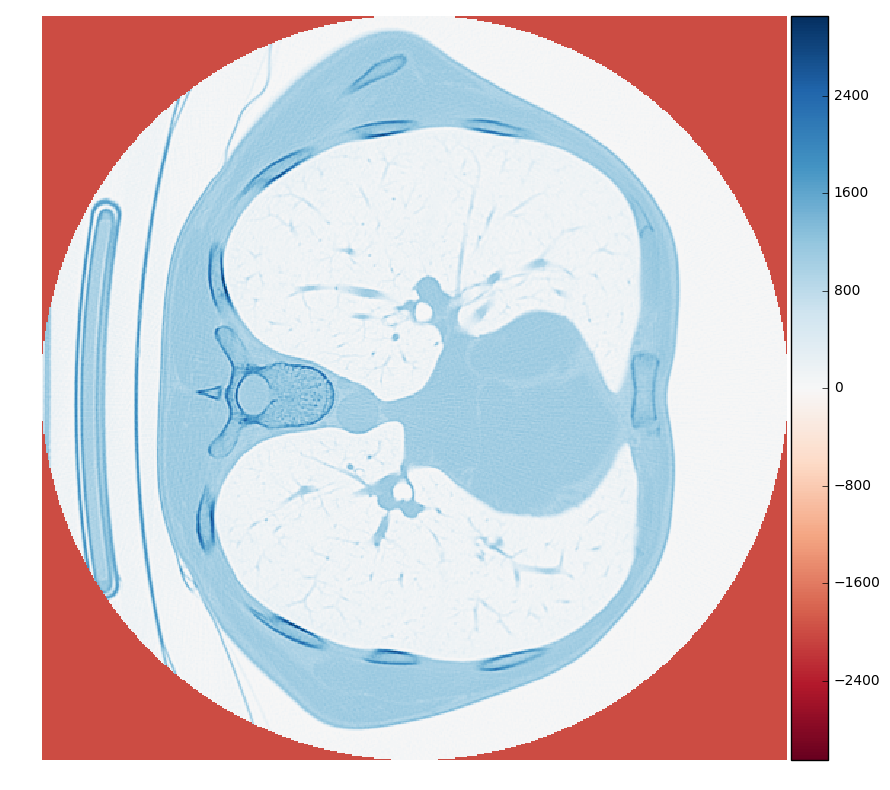

In [8]:
img = np.fromfile("data/id030.raw", 
                  dtype=np.int16).reshape(512, 512, 100)
show_image(img[:, :, 50])

/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:77: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


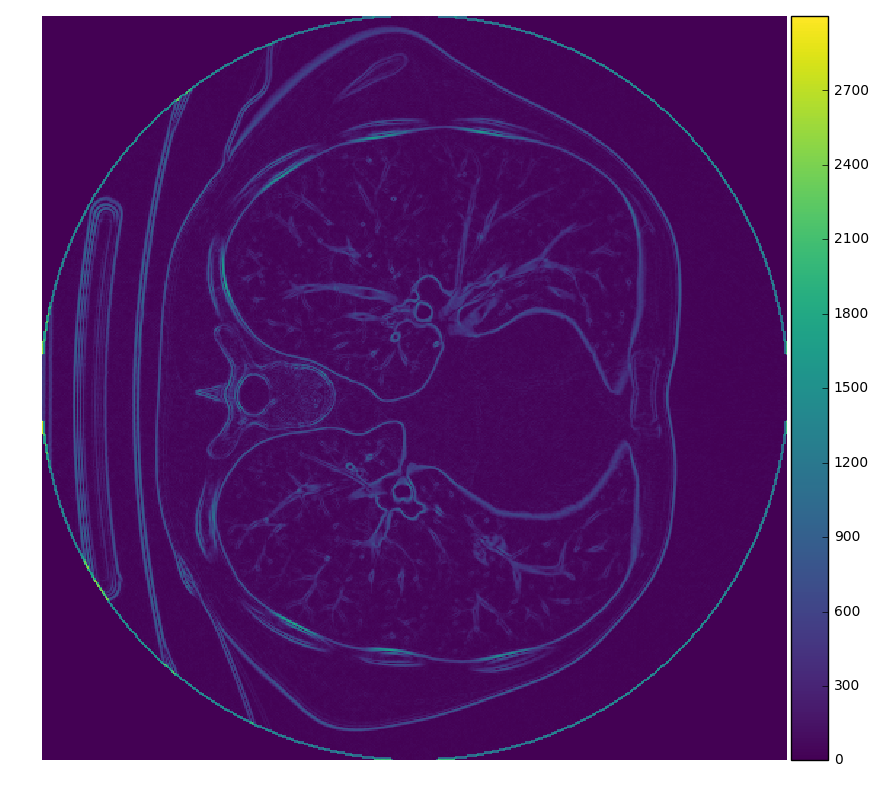

In [9]:
grad = calculate_grad_3d(img)
show_image(grad[:, :, 50])

443.13104899999996


/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


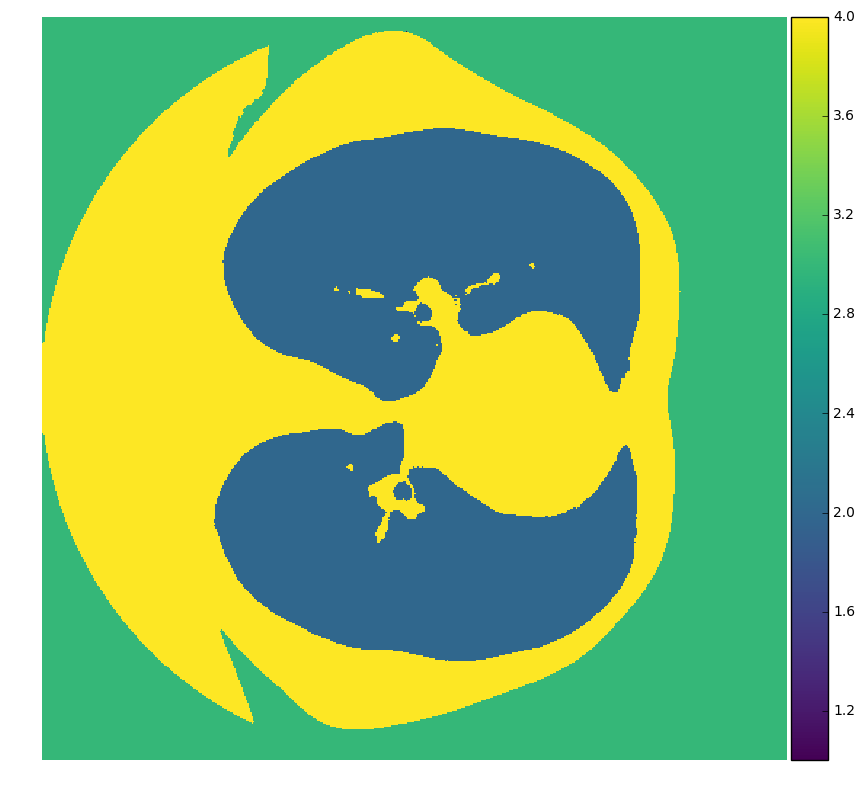

In [10]:
points = [(10, 250, 50), (150, 250, 50), (200, 450, 50), (200, 100, 50)]
begin_time = clock()
image = calculate_watershed_3d(grad, points, PriorityQueue())
end_time = clock()
print(end_time - begin_time)
show_image(image[:, :, 50])

/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


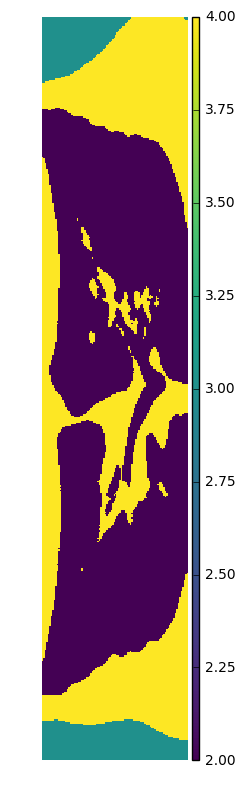

In [11]:
show_image(image[:, 256, :])

/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


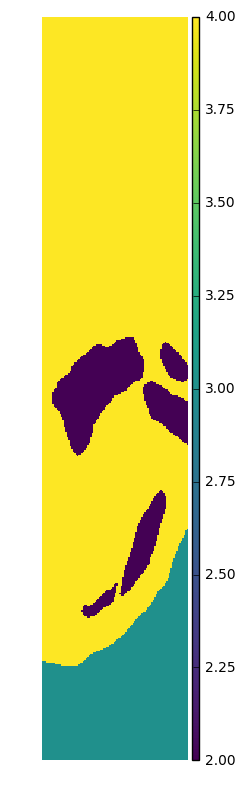

In [12]:
show_image(image[256, :, :])

403.78025799999995


/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


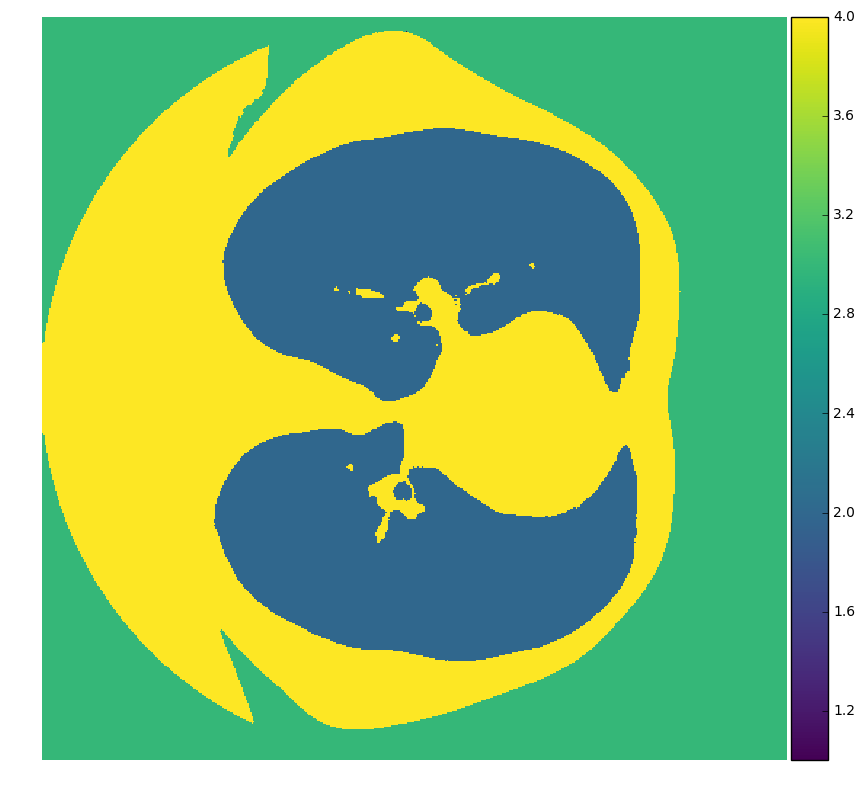

In [13]:
begin_time = clock()
image = calculate_watershed_3d(grad, points, HierarchicalQueue())
end_time = clock()
print(end_time - begin_time)
show_image(image[:, :, 50])

/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


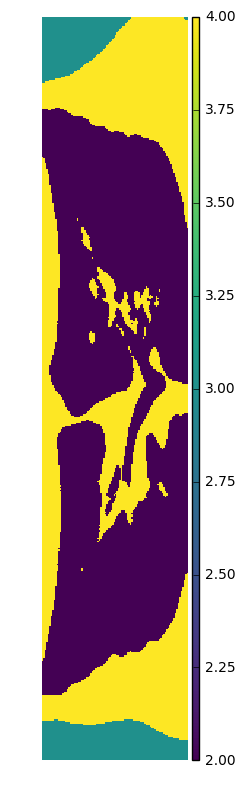

In [14]:
show_image(image[:, 256, :])

/home/yrustt/Desktop/Python/Digital-images-processing-fundamentals/venv/lib/python3.5/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image dynamic range; displaying image with stretched contrast.
  warn("Low image dynamic range; displaying image with "


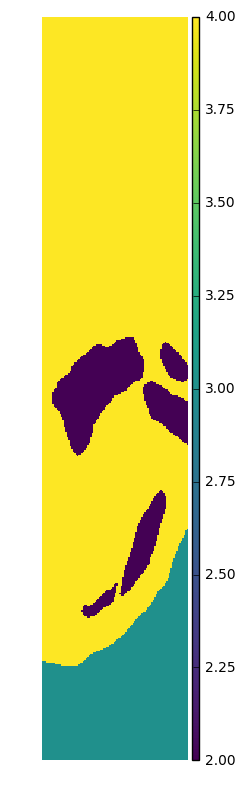

In [15]:
show_image(image[256, :, :])